# Data 정보
* Survived: 0 = Dead, 1 = Survived <br>
* pclass: Ticket class 1 = 1st, 2 = 2nd, 3 = 3rd <br>
* sibsp: # of siblings / spouses aboard the Titanic <br>
* parch: # of parents / children aboard the Titanic <br>
* ticket: Ticket number <br>
* cabin: Cabin number <br>
* embarked: Port of Embarkation C = Cherbourg, Q = Queenstown, S = Southampton <br>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
from matplotlib import rc

# matplotlib 한글 font 사용
plt.rcParams["font.family"]='NanumGothic'

# 노트북 안에 그래프 그리기 위해 셋팅
%matplotlib inline

# 그래프를 격자 스타일로 (숫자 범위가 눈에 잘 띄도록 ggplot 스타일 사용.)
plt.style.use("ggplot")

# 그래프에서 마이너스 폰트 깨지는 문제 해결을 위해
mpl.rcParams["axes.unicode_minus"] = False

# 1. EDA (Explore Data Analysis)
#### 시각화 및 통계를 통해서 데이터 분포 파악, 결측치 파악

In [2]:
train = pd.read_csv("./data/train.csv")

In [3]:
test = pd.read_csv("./data/test.csv")

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 1) 결측치 파악

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

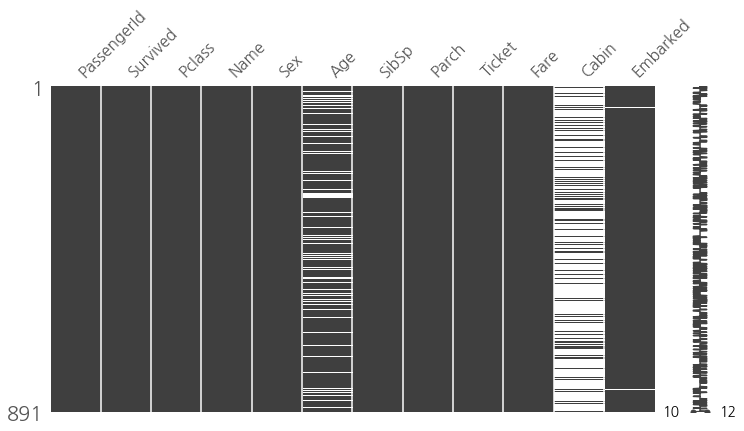

In [7]:
msno.matrix(train, figsize=(12,6))

## 2) 시각화 및 통계를 통해서 데이터 분포 파악
### (1) 통계 : get_probability

In [8]:
def get_probability(feature):
    Survived = train[train["Survived"]==1][feature].value_counts()
    Dead = train[train["Survived"]==0][feature].value_counts()
    total = Survived + Dead
    print("살아남은 확률: \n{} \n 죽은 확률: \n{}".format(Survived/total, Dead/total))

In [9]:
features = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
for feature in features:
    get_probability(feature)

살아남은 확률: 
female    0.742038
male      0.188908
Name: Sex, dtype: float64 
 죽은 확률: 
female    0.257962
male      0.811092
Name: Sex, dtype: float64
살아남은 확률: 
1    0.629630
2    0.472826
3    0.242363
Name: Pclass, dtype: float64 
 죽은 확률: 
1    0.370370
2    0.527174
3    0.757637
Name: Pclass, dtype: float64
살아남은 확률: 
0    0.345395
1    0.535885
2    0.464286
3    0.250000
4    0.166667
5         NaN
8         NaN
Name: SibSp, dtype: float64 
 죽은 확률: 
0    0.654605
1    0.464115
2    0.535714
3    0.750000
4    0.833333
5         NaN
8         NaN
Name: SibSp, dtype: float64
살아남은 확률: 
0    0.343658
1    0.550847
2    0.500000
3    0.600000
4         NaN
5    0.200000
6         NaN
Name: Parch, dtype: float64 
 죽은 확률: 
0    0.656342
1    0.449153
2    0.500000
3    0.400000
4         NaN
5    0.800000
6         NaN
Name: Parch, dtype: float64
살아남은 확률: 
S    0.336957
C    0.553571
Q    0.389610
Name: Embarked, dtype: float64 
 죽은 확률: 
S    0.663043
C    0.446429
Q    0.610390
Name: Embar

### (2) 시각화 : bar chart, count plot, facetgrid

In [10]:
def bar_chart(feature, ax=None):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived, dead])
    df.index = ['Survived', 'Dead']
    df.plot(kind='bar', stacked=True, ax=ax)

[Text(0.5,1,'승선 장소')]

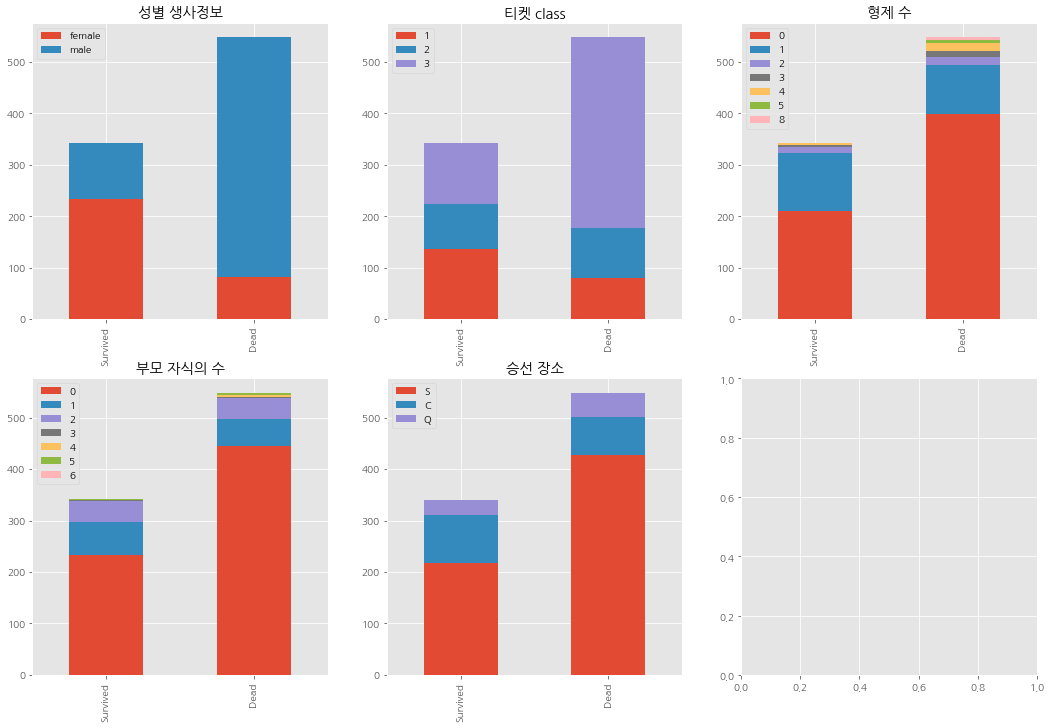

In [11]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

bar_chart('Sex', ax1)
bar_chart('Pclass', ax2)
bar_chart('SibSp', ax3)
bar_chart('Parch', ax4)
bar_chart('Embarked', ax5)

ax1.set(title="성별 생사정보")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식의 수")
ax5.set(title="승선 장소")

In [12]:
def count_plot(column, ax):
    sns.countplot(x=column, hue='Survived', data=train, ax=ax)

[Text(0.5,1,'승선 장소')]

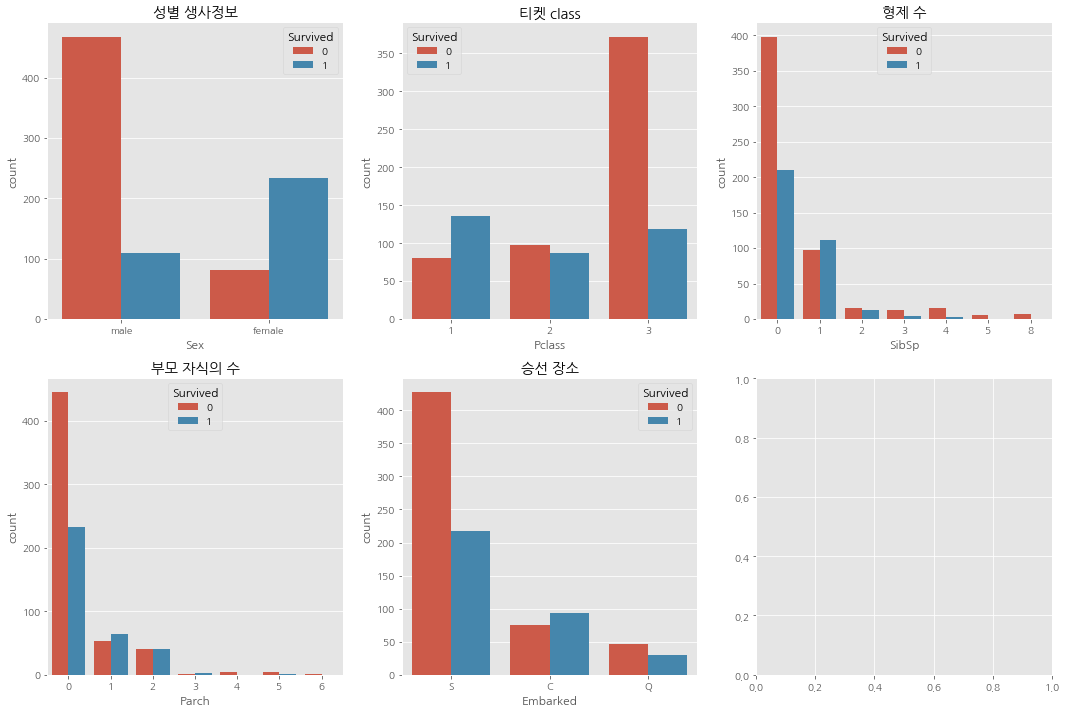

In [13]:
figure, ((ax1,ax2,ax3), (ax4,ax5,ax6)) = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18,12)

count_plot('Sex', ax1)
count_plot('Pclass', ax2)
count_plot('SibSp', ax3)
count_plot('Parch', ax4)
count_plot('Embarked', ax5)

ax1.set(title="성별 생사정보")
ax2.set(title="티켓 class")
ax3.set(title="형제 수")
ax4.set(title="부모 자식의 수")
ax5.set(title="승선 장소")

In [14]:
# contious 한 데이터 column 의 시각화
def draw_facetgrid(feature):
    facet = sns.FacetGrid(train, hue="Survived", aspect=5)
    facet.map(sns.kdeplot, feature, shade=True)
    facet.set(xlim=(0, train[feature].max()))
    # survived 라벨을 표시.
    facet.add_legend() 
    plt.show()

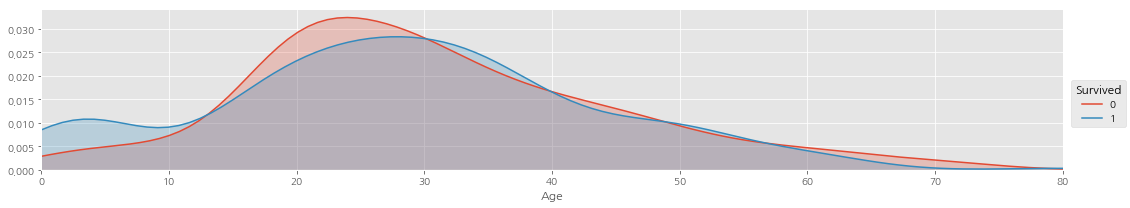

In [15]:
draw_facetgrid("Age")

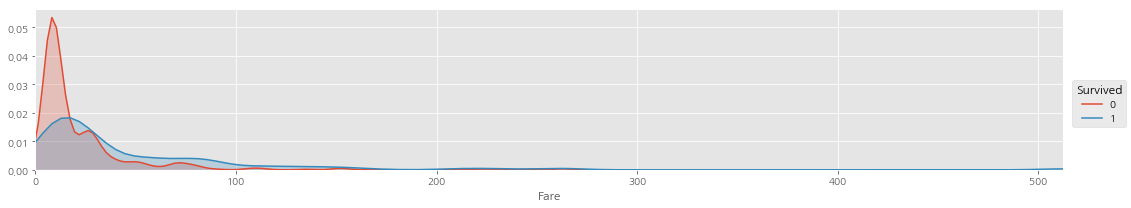

In [16]:
draw_facetgrid("Fare")

### 데이터 시각화를 통한 데이터 분석 결과
__1. Sex__
-> 남자의 경우 죽을 확률이 확연하게 큼을 확인할 수 있다.  
__2. Pclass__
-> 티켓 클래스가 높을수록 살아남을 확률이 크다.  
__3,4. SibSp, Parch__
-> 형제, 부모/자식이 없는 경우 죽을 확률이 크다.  
__5. Embarked__
-> C 승선장 Cherbourg에서 탄 사람이 살아남은 수가 크다.  
__6. Age__
-> 10살 이하의 경우 살 확률이 크고, 10대 중반에서 30살까지는 죽을 확률이 더 크다. (나머지는 크게 의미 없음)  
__7. Fare__
-> 티켓 가격이 높을 수록 살아남을 확률이 더 크다.

# 2. Feature Engineering
#### 모델의 성능을 높이기 위해 모델에 입력할 데이터를 만들기 위해 주어진 초기 데이터로부터 특징을 가공하고 생성하는 전체 과정
Feature Selection, Dimension Reduction, Feature Generation(Construction)

## 1) Feature Selection
불필요한 데이터 삭제
- Cabin : 결측치가 너무 많다.
- Ticket : 티켓 번호로 생존 여부를 알기는 어렵다.

In [17]:
def drop_columns(feature):
    train.drop(feature, axis=1, inplace=True)
    test.drop(feature, axis=1, inplace=True)

In [18]:
drop_columns('Cabin')

In [19]:
drop_columns('Ticket')

## 2) Feature Generation

### (1) Sex

In [20]:
train_test_data = [train, test]

In [21]:
sex_mapping = {"male": 0 , "female":1}

In [22]:
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

### (2) Title

In [23]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [24]:
train["Title"].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Major         2
Mlle          2
Ms            1
Mme           1
Countess      1
Capt          1
Jonkheer      1
Don           1
Lady          1
Sir           1
Name: Title, dtype: int64

In [25]:
drop_columns("Name")

In [26]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 0, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 2, "Lady": 2, "Jonkheer": 1, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 0 }

In [27]:
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [28]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.25,S,0


In [29]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,22.0,1,0,7.25,S,0


### (3) Age

In [30]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [31]:
train['AgeBand'] = pd.cut(train['Age'], 5)
train[['AgeBand', 'Survived']].groupby('AgeBand', as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(0.34, 16.336]",0.550000
1,"(16.336, 32.252]",0.328713
2,"(32.252, 48.168]",0.436893
3,"(48.168, 64.084]",0.434783
4,"(64.084, 80.0]",0.090909


In [32]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 32), 'Age'] = 0.5,
    dataset.loc[(dataset['Age'] > 32) & (dataset['Age'] <= 48), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 48) & (dataset['Age'] <= 64), 'Age'] = 1.5,
    dataset.loc[ dataset['Age'] > 64, 'Age'] = 2

In [33]:
train.drop("AgeBand", axis=1, inplace=True)

In [34]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,0.5,1,0,7.25,S,0


In [35]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,1.0,0,0,7.8292,Q,0


### (4) Embarked

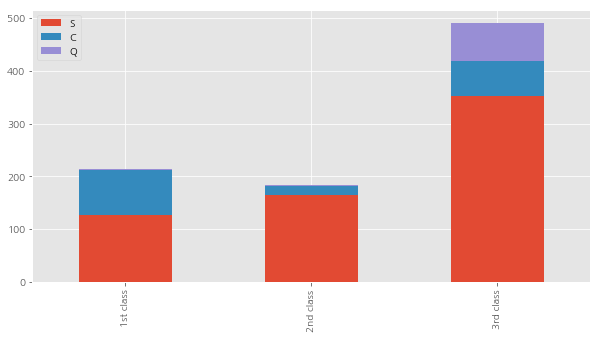

In [36]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [37]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [38]:
mapping_data ={"S":0, "Q":1, "C":2}

In [39]:
for dataset in train_test_data:
    dataset["Embarked"] = dataset["Embarked"].map(mapping_data)

In [40]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,0.5,1,0,7.25,0,0


In [41]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,1.0,0,0,7.8292,1,0


### (5) Fare

In [42]:
train["FareBand"] = pd.cut(train["Fare"], 5)
train[["FareBand", "Survived"]].groupby("FareBand", as_index=False).mean().sort_values(by='FareBand', ascending=True)

,FareBand,Survived
0,"(-0.512, 102.466]",0.361575
1,"(102.466, 204.932]",0.757576
2,"(204.932, 307.398]",0.647059
3,"(307.398, 409.863]",NaN
4,"(409.863, 512.329]",1.000000


In [43]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 102, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 102) & (dataset['Fare'] <= 204), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 204) & (dataset['Fare'] <= 307), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 307, 'Fare'] = 3

In [44]:
train.drop("FareBand", axis=1, inplace=True)

In [45]:
test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           1
Embarked       0
Title          0
dtype: int64

In [46]:
test["Fare"].fillna(0.0, inplace=True)

In [47]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,0,0.5,1,0,0.0,0,0


In [48]:
test.head(1)

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,892,3,0,1.0,0,0,0.0,1,0


### (6) SibSp, Parch

(0, 11.0)

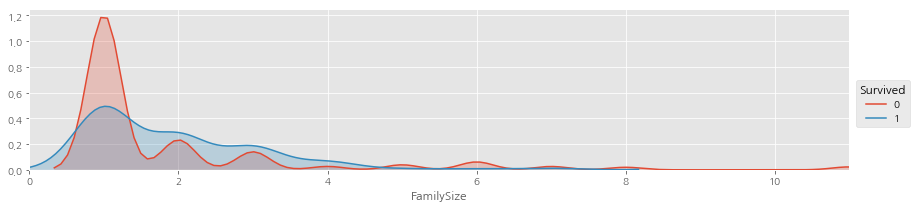

In [49]:
train["FamilySize"] = train["SibSp"] + train["Parch"] +1
test["FamilySize"] = test["SibSp"] + test["Parch"] +1

facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,'FamilySize',shade= True)
facet.set(xlim=(0, train['FamilySize'].max()))
facet.add_legend()
plt.xlim(0)

In [50]:
train["FamilySize"].value_counts()

1     537
2     161
3     102
4      29
6      22
5      15
7      12
11      7
8       6
Name: FamilySize, dtype: int64

In [51]:
test["FamilySize"].value_counts()

1     253
2      74
3      57
4      14
5       7
11      4
7       4
6       3
8       2
Name: FamilySize, dtype: int64

In [52]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}

In [53]:
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [54]:
drop_columns("SibSp")
drop_columns("Parch")

In [55]:
train.head(1)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,1,0,3,0,0.5,0.0,0,0,0.4


In [56]:
test.head(1)

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Title,FamilySize
0,892,3,0,1.0,0.0,1,0,0.0


In [57]:
droped_data =["Survived", "PassengerId"]
train_data = train.drop(droped_data, axis=1)

# 3. Modeling
#### 타이타닉 문제는 label이 있는 지도학습 중에서 label 데이터가 discrete한 classification 문제

### Cross Validation ( K-fold)  
데이터를 k 개로 나눠서 validation 하는 방법.  
ex) 만약 k가 10이라면 9/10의 데이터는 학습하고 1/10검증을 10번 반복해서 평균 수치를 내는 validation 방법.

In [58]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.model_selection import KFold, cross_val_score

In [59]:
target = train["Survived"]

In [60]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 1) k-NN

In [61]:
clf = KNeighborsClassifier(n_neighbors=11)
scoring = 'accuracy'

score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)

print(score)
print(round(np.mean(score)*100,2))

[0.78888889 0.82022472 0.7752809  0.80898876 0.80898876 0.7752809
 0.76404494 0.80898876 0.80898876 0.79775281]
79.57


## 2) Decision Tree

In [62]:
clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[0.84444444 0.80898876 0.76404494 0.80898876 0.84269663 0.78651685
 0.78651685 0.78651685 0.80898876 0.7752809 ]
80.13


## 3) Naive Bayes

In [63]:
clf = GaussianNB()
scoring ='accuracy'
socre = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
print(round(np.mean(score)*100,2))

[0.84444444 0.80898876 0.76404494 0.80898876 0.84269663 0.78651685
 0.78651685 0.78651685 0.80898876 0.7752809 ]
80.13


## 4) SVM

In [64]:
clf = SVC()
scoring ='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.83333333 0.78651685 0.7752809  0.78651685 0.84269663 0.79775281
 0.78651685 0.83146067 0.79775281 0.83146067]


80.69

## 5) Random Forest

In [65]:
clf = RandomForestClassifier(n_estimators=200)
scoring ='accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(score)
round(np.mean(score)*100,2)

[0.83333333 0.79775281 0.80898876 0.7752809  0.83146067 0.78651685
 0.83146067 0.7752809  0.80898876 0.79775281]


80.47

# 4. Testing

In [66]:
clf = SVC()
clf.fit(train_data, target)

test_data = test.drop("PassengerId", axis=1).copy()
prediction = clf.predict(test_data)

In [67]:
submission = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('./data/submission.csv', index=False)